##Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing Datasets

In [26]:
dataset = pd.read_csv('nba_2013.csv',usecols=['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p',
 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'])
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


##Spilitting into test and training sets

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

##Checking for missing data

In [28]:
array_sum = np.sum(x_train)
array_has_nan = np.isnan(array_sum)
print(array_has_nan)

True


##Taking care of missing data

In [29]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x_train[:,0:25])
x_train[:,0:25]=imputer.transform(x_train[:,0:25])
x_test[:,0:25]=imputer.transform(x_test[:,0:25])



In [30]:
array_sum = np.sum(x_train)
array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


##Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, :] = sc.fit_transform(x_train[:, :])
x_test[:, :] = sc.transform(x_test[:, :])

## Finding out how many neighbours are giving the best score

For K: 1 , regression score is: 0.9270
For K: 2 , regression score is: 0.9518
For K: 3 , regression score is: 0.9601
For K: 4 , regression score is: 0.9612
For K: 5 , regression score is: 0.9622
For K: 6 , regression score is: 0.9621
For K: 7 , regression score is: 0.9668
For K: 8 , regression score is: 0.9655
For K: 9 , regression score is: 0.9622
For K: 10 , regression score is: 0.9617
For K: 11 , regression score is: 0.9620
For K: 12 , regression score is: 0.9598
For K: 13 , regression score is: 0.9565
For K: 14 , regression score is: 0.9590
For K: 15 , regression score is: 0.9576
For K: 16 , regression score is: 0.9559
For K: 17 , regression score is: 0.9550
For K: 18 , regression score is: 0.9530
For K: 19 , regression score is: 0.9522
For K: 20 , regression score is: 0.9521


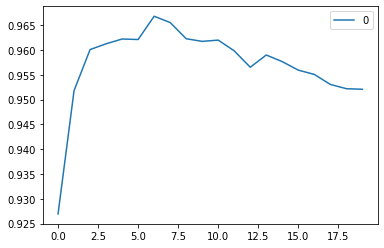

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_squared_log_error,r2_score
from math import sqrt
reg_score = []
# print(mean_squared_error(y_train,y_train,squared = False))
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train) 
    pred=model.predict(x_test) 
    print ("For K:",K, ", regression score is:",format(r2_score(y_test, pred),'.4f'))
    reg_score.append(r2_score(y_test, pred))
curve = pd.DataFrame(reg_score) 
curve.plot()


## k=7 gives us highest regression score, improving that score with some parameters

In [36]:
knn = KNeighborsRegressor(n_neighbors = 7,weights='distance')
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("Regression score is:", format(r2_score(y_test, y_pred)*100,'.4f'),"%")
print ("Mean Squared Error is:", format(sqrt(mean_squared_log_error(y_test, y_pred)), '.7f'))


Regression score is: 96.7456 %
Mean Squared Error is: 0.6756411


In [37]:
comparison = pd.DataFrame({'Actual Points': y_test, 'Predicted Points': y_pred})
comparison


,Actual Points,Predicted Points
0,436,340.942247
1,717,681.054444
2,1096,968.299463
3,19,64.945301
4,988,927.108715
...,...,...
140,1107,1106.076509
141,35,31.404343
142,810,815.352903
143,796,710.697002
